# Практическая работа №1: Основы анализа и моделирования социальных сетей
Выполнил студент гр. 0381 Печеркин Алексей. Вариант №14

## Цель работы
Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения
Социоматрица - матрица X размерность g x g описывающая смежные узлы<br>
$$ X = \{x_{ij;r}\}    i,j = 1,...,g $$<br>
Сеть - объект, представляющий собой совокупность конечного набора акторов и отношения определенное на них.<br>
Актор - дискретное индивидуальное корпоративное социальная единица.<br>
Размер сети - количество акторов в сети.<br>
Плотность сети - доля имеющихся связей по отношению к максимально возможному количеству связей в сети с таким же количеством акторов.<br>
Плотность для ориентированной сети - $$\Delta = \frac{L}{A_g^2}$$ <br>
Плотность для неориентированной сети - $$\Delta = \frac{L}{C_g^2}$$ <br>
Компонента - подгруппа в которой все акторы связаны друг с другом прямо или косвенно.<br>
Диаметр сети - наибольшая длина любого из кратчайших путей между всеми парами узлов.<br>
Коэффициент кластеризации - доля закрытых треугольников (триад, где наблюдаются все связи) по отношению к общему количеству треугольников.<br>
Степень узла - число ребер, инцидентных узлу $n_i$ <br>
Средняя степень: $$\bar{d} = \frac{1}{g}\sum_{i=1}^gd(n_i)$$
Дисперсия степеней узла: $$S_d^2 = \frac{1}{g}\sum_{i=1}^g(d(n_i)-\bar{d})^2$$
Центральность - мера, характеризующая актора с большим количеством связей(прямых или косвенных).<br>
Центральность по степени: $$C_D(n_i) = d(n_i)$$<br>
Нормированная центральность по степени: $$\frac{d(n_i)}{g-1}$$<br>
Центральность по близости - более важным считается узел, наиболее близкий к остальным.
$$C_C(n_i)=(\sum_{i=1}^gd(n_i,n_j))^{-1}$$
Нормированная центральность по близости: $$C_C^{'}(n_i)=(g-1)C_C(n_i)$$
Центральность по посредничеству показывает, насколько важную роль узел играет на пути между другими узлами.
$$C_B(n_i)=\sum_{i<k}g_{ik}(n_i)/g_{jk}$$, где $g_{jk}$ расстояние между узлами j и k, а
$g_{jk}(n_i)$ - количество кратчайших путей между узлами j и k через i.<br>
Центральность по информации показывает, сколько информации содержится в путях, которые начинаются и заканчиваются у определенного актора.
$$ A = \{a_{ij}\}$$ - матрица размера g x g, где $$ a_{ii} = 1 + \sum_{j=1}^{g}{x_{ij}}$$
$$ a_{ij} = 1 \text{ , if } n_{i} \text{ and } n_{j} \text{ are not connected}$$
$$ a_{ij} = 1-x_{ij} \text{ , if } n_{i} \text{ and } n_{j} \text{ are connected}$$
$$ x_{ij} \text{- weight of edge between }n_{i} \text{ and } n_{j}$$
$$ C = A^{-1}$$
$$C_I(n_{i}) =  \frac{1}{c_{ii}+(T-2R)/g}$$, где $$T = trace(C)$$ $$R = \sum_{j=1}^{g}c_{ij}$$
$$C_I^{'}=\frac{C_I(n_i)}{\sum_{i}C_I(n_i)}$$
Централизация показывает, насколько равномерно распределены центральности акторов в сети.<br>
Централизация по степени:
$$C_D = \frac{\sum_{i=1}^g(C_D(n^{*})-C_D(n_i))}{(g-1)(g-2)}$$
Централизация по близости:
$$C_C = \frac{\sum_{i=1}^g(C_C^{'}(n^{*})-C_C^{'}(n_i))}{(g-1)(g-2)/(2g-3)}$$
Централизация по посредничеству:
$$C_B = \frac{\sum_{i=1}^g(C_B^{'}(n^{*})-C_B^{'}(n_i))}{g-1}$$
Централизация по информации:
$$C_I =\frac{1}{g}\sum_{i=1}^g(C_I^{'}(n^{*})-\bar{C_I}(n_i))^2$$, где $$ \bar{C_I} = \sum_iC_I^{'}(n_i)$$
Точка сочленения - узел, при удалении которого увеличивается количество компонент связности.<br>
Мост - ребро, при удалении которого одна компонента связности разделяется на 2.<br>
Престиж - мера, характеризующая фктора с большим количеством входящих связей.<br>
Престиж по степени - входящая степень каждого узла. $$P_D(n_i) = d_I(n_i)=x_{+i}$$
Нормированный престиж по степени: $$P_D^{'}(n_i) =\frac{x_{+i}}{g-1}$$
Престиж по близости - определяет, насколько все акторы близки к заданному по расстоянию до него.
$$ P_P(n_i) = \frac{\#I_i/(g-1)}{\sum_{j:n_j \in I_i}(d(n_j,n_i)/\#I_i)}$$


## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
1. Из файла florentine_marital.csv извлечь социоматрицу с помощью соответствующих функций. Вывести полученную социоматрицу на экран.

In [3]:
library(igraph)

file <- read.csv('./even/florentine_marital.csv', header = FALSE) #Считывание из csv
data <- tail(file,16)  #Удаление комментариев
data <- data.matrix(data)-1
print(data)


Присоединяю пакет: 'igraph'


Следующие объекты скрыты от 'package:stats':

    decompose, spectrum


Следующий объект скрыт от 'package:base':

    union




   V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16
3   0  0  0  0  0  0  0  0  1   0   0   0   0   0   0   0
4   0  0  0  0  0  1  1  0  1   0   0   0   0   0   0   0
5   0  0  0  0  1  0  0  0  1   0   0   0   0   0   0   0
6   0  0  0  0  0  0  1  0  0   0   1   0   0   0   1   0
7   0  0  1  0  0  0  0  0  0   0   1   0   0   0   1   0
8   0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   0
9   0  1  0  1  0  0  0  1  0   0   0   0   0   0   0   1
10  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   0
11  1  1  1  0  0  0  0  0  0   0   0   0   1   1   0   1
12  0  0  0  0  0  0  0  0  0   0   0   0   0   1   0   0
13  0  0  0  1  1  0  0  0  0   0   0   0   0   0   1   0
14  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0
15  0  0  0  0  0  0  0  0  1   0   0   0   0   0   1   1
16  0  0  0  0  0  0  0  0  1   1   0   0   0   0   0   0
17  0  0  0  1  1  0  0  0  0   0   1   0   1   0   0   0
18  0  0  0  0  0  0  1  0  1   0   0   0   1   0   0   0


2. Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер

In [3]:
graph <- graph.adjacency(data,mode="undirected") #Преобразование в граф
edges <- get.edgelist(graph) #Список ребер графа
print(head(edges,5))

     [,1] [,2]
[1,] "V1" "V9"
[2,] "V2" "V6"
[3,] "V2" "V7"
[4,] "V2" "V9"
[5,] "V3" "V5"


3. Присвоить имена столбцам и строкам социоматрицы (имена – первая строка в csv-файле после комментариев)

In [4]:
rownames(data) <- file[2,] #Имена строк
colnames(data) <- file[2,] #Имена столбцов

4. С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, передаваемые в функцию.<br>
В функцию передается социоматрица data и параметр, который отвечает за тип сети - неориентированный


In [5]:
network <- graph.adjacency(data,mode="undirected")  #Преобразование в граф

5. Отобразить сеть с помощью алгоритмов укладки Фрюхтермана–Рейнгольда и Камада–Каваи. Объяснить, в чём различие между алгоритмами и укладками.

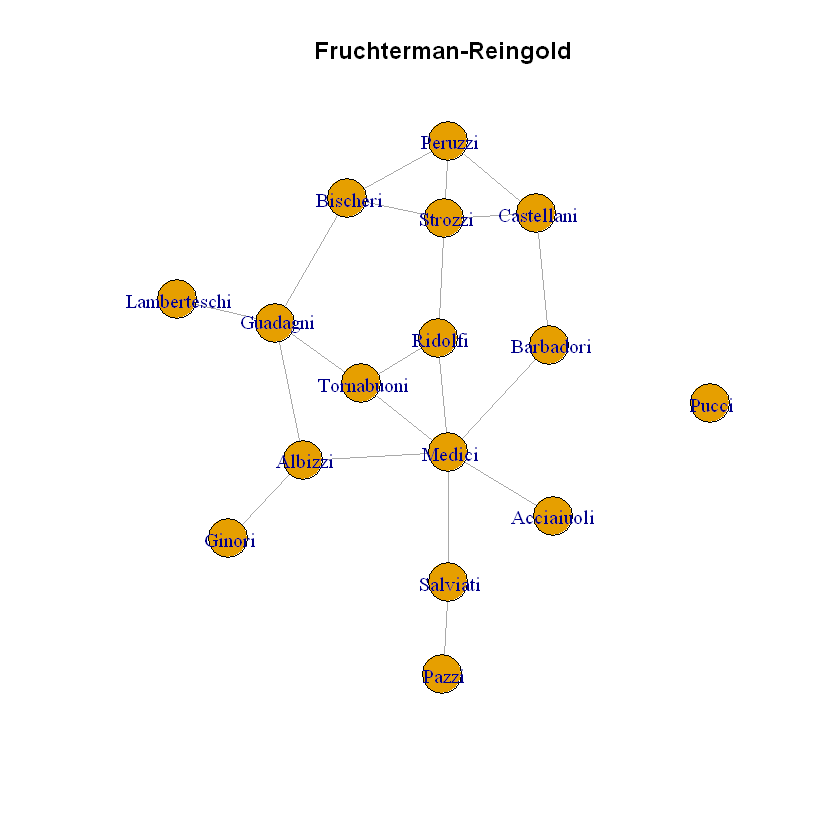

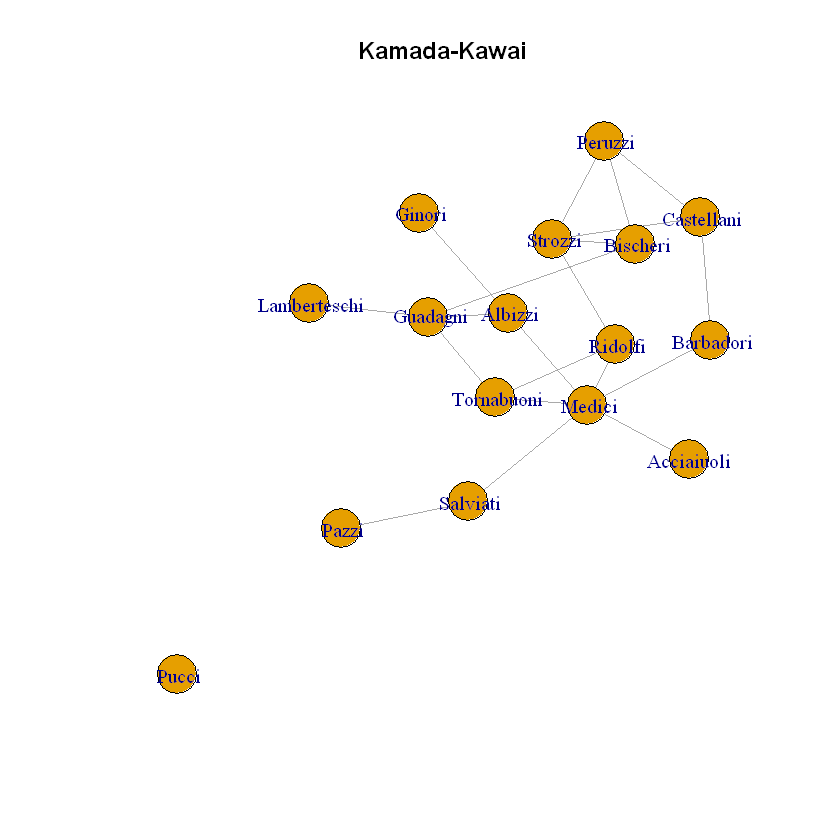

In [6]:
plot(network,layout = layout.fruchterman.reingold,main="Fruchterman-Reingold")
plot(network,layout = layout.kamada.kawai,main="Kamada-Kawai")

Оба алгоритма относятся к силовым алгоритмам укладки.

Алгоритм Фрюхтермана-Рейнгольда на каждой итерации применяет силу к каждой вершине,а Комада-Кавай на каждой итерации выбирает одну вершину, на которую действует наибольшая сила и перемещает её, при этом остальные вершины остаются фиксированными.

6. Вывести «описательную сводку» сети.<br>
Сеть содержит 16 акторов и 20 связей

In [7]:
cat("Network summary:")
summary(network)

Network summary:IGRAPH 1e23fa2 UN-- 16 20 -- 
+ attr: name (v/c)


7. Вычислить «пятичисловую сводку» сети:<br>
(a) Вычислить размер сети.<br>
(b) Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.<br>
(c) Определить число компонент в сети по графику. Подтвердить свои догадки с помощью соответствующей функции. Сделать выводы.<br>
(d) Вычислить диаметр сети. Сделать выводы.<br>
(e) Вычислить коэффициент кластеризации. Сделать выводы.<br>

In [8]:
cat("Network size: ",gorder(network),"\n")

cat("Network density: ",edge_density(network),"\n")

den <- gsize(network)/choose(gorder(network), 2)

cat("Network density 2: ",den,"\n")

cat("Components: ",components(network)$no,"\n")

cat("Diameter: ",diameter(network),"\n")

cat("Transitivity: ",transitivity(network),"\n" )

Network size:  16 
Network density:  0.1666667 
Network density 2:  0.1666667 
Components:  2 
Diameter:  5 
Transitivity:  0.1914894 


Плотность сети низкая. Значение полученное при помощи функции igraph совпадает со значением рассчитанным по формуле.

По графику видно 2 компоненты: 1 одиночный актор и 15 связанных между собой. Вызов функции подтверждает количество компонент.

Вычисленный диаметр сети - 5. На графике это соответствует пути от Lamberteschi до Pazzi. Вершин, кратчайший путь между которыми длиннее найти нельзя.

Коэффициент кластеризации невысокий, то есть большинство треугольников в сети открыты.

8. Вычислить среднюю степень узлов и дисперсию. Сделать выводы.

In [9]:
cat("Mean degree: ",mean(degree(network)),"\n")

cat("Degree variance: ",var(degree(network)),"\n")

Mean degree:  2.5 
Degree variance:  2.266667 


Средняя степень узлов - 2.5<br>
Дисперсия - 2.266667<br>
Дисперсия довольно высокая, так как есть узлы с нулевой степенью и узлы со степенью значительно больше среднего.

9. Заполнить таблицу для различных мер центральности. Примечание: меры центральности вычислить для неизолированных вершин.<br>
Сделать выводы.

In [10]:
isolated <- which(degree(network)==0) 
conn.net <- delete.vertices(network,isolated) #conn.net - сеть без изолированных акторов

g<-gorder(conn.net) #g - кол-во акторв в сети
lap<-solve(laplacian_matrix(conn.net) + 1) 
cii <- diag(lap)
trace <- sum(diag(lap))
row.sum <- 2*colSums(lap)
CI <- 1 / (cii + (trace - row.sum) / g)
CIn <- CI / sum(CI)

Cd <- degree(conn.net) #Вычисление центральности по степени

centrality <- data.frame(n=1:g,
           Cdn = Cd / (g-1),#Нормированная центральность по степени
           Ccn = closeness(conn.net,normalized = TRUE), #Нормированная центральность по близости
           Cbn = betweenness(conn.net,normalized = TRUE), #Нормированная центральность по посредничеству
           CIn = CIn
)
centrality

,n,Cdn,Ccn,Cbn,CIn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Acciaiuoli,1,0.07142857,0.3684211,0.00000000,0.04943215
Albizzi,2,0.21428571,0.4827586,0.21245421,0.07408484
Barbadori,3,0.14285714,0.4375000,0.09340659,0.06816655
Bischeri,4,0.21428571,0.4000000,0.10439560,0.07427531
Castellani,5,0.21428571,0.3888889,0.05494505,0.07093098
Ginori,6,0.07142857,0.3333333,0.00000000,0.04309479
Guadagni,7,0.28571429,0.4666667,0.25457875,0.08190476
Lamberteschi,8,0.07142857,0.3255814,0.00000000,0.04562892
Medici,9,0.42857143,0.5600000,0.52197802,0.09502877


| $n_{i}$|$C_D^{\prime}(n_i)$|$C_C^{\prime}(n_i)$|$C_B^{\prime}(n_i)$|$C_I^{\prime}(n_i)$|
|--------------|------------|-----------|------------|------------|
|   Acciaiuoli | 0.07142857 | 0.3684211 | 0.00000000 | 0.04943215 |
|      Albizzi | 0.21428571 | 0.4827586 | 0.21245421 | 0.07408484 |
|    Barbadori | 0.14285714 | 0.4375000 | 0.09340659 | 0.06816655 |
|     Bischeri | 0.21428571 | 0.4000000 | 0.10439560 | 0.07427531 |
|   Castellani | 0.21428571 | 0.3888889 | 0.05494505 | 0.07093098 |
|       Ginori | 0.07142857 | 0.3333333 | 0.00000000 | 0.04309479 |
|     Guadagni | 0.28571429 | 0.4666667 | 0.25457875 | 0.08190476 |
| Lamberteschi | 0.07142857 | 0.3255814 | 0.00000000 | 0.04562892 |
|       Medici | 0.42857143 | 0.5600000 | 0.52197802 | 0.09502877 |
|        Pazzi | 0.07142857 | 0.2857143 | 0.00000000 | 0.03515798 |
|      Peruzzi | 0.21428571 | 0.3684211 | 0.02197802 | 0.06953773 |
|      Ridolfi | 0.21428571 | 0.5000000 | 0.11355311 | 0.08040678 |
|     Salviati | 0.14285714 | 0.3888889 | 0.14285714 | 0.05337198 |
|      Strozzi | 0.28571429 | 0.4375000 | 0.10256410 | 0.07841151 |
|   Tornabuoni | 0.21428571 | 0.4827586 | 0.09157509 |  0.0805669 |


Акторы, которые находятся в центре сети имеют наибольшую центральность. Напрмер, актор Medici имеет наибольшую центральность по всем метрикам.

10. Вычислить значение централизации для каждой меры. Сделать выводы.


In [11]:
Cdg <- centralize(Cd,((g-1)*(g-2)))
Ccg <- centralize(centrality$Ccn,((g-1)*(g-2)/(2*g-3)))
Cbg <- centralize(centrality$Cbn,g-1)
Cig <- var(CIn)
cat("Degree centralization: ",Cdg,"\n")
cat("Closeness centralization: ",Ccg,"\n")
cat("Betweenness centralization: ",Cbg,"\n")
cat("Information centralization: ",Cig,"\n")

Degree centralization:  0.2747253 
Closeness centralization:  0.3224523 
Betweenness centralization:  0.4368132 
Information centralization:  0.0002973536 


| $C_D$     | $C_C$     | $C_B$     | $C_I$        |
|-----------|-----------|-----------|--------------|
| 0.2747253 | 0.3224523 | 0.4368132 | 0.0002973536 |

Значение централизации сильно зависит от используемой меры.

11. Выявить точки сочленения и мосты сети. Подтвердить свои догадки с помощью соответствующих функций (если их нет – реализуйте их самостоятельно). Построить график сети, на котором выделены точки сочленения и мосты.

+ 4/16 vertices, named, from a1f7df8:
[1]  Albizzi   Guadagni  Medici    Salviati
+ 5/20 edges from a1f7df8 (vertex names):
[1]  Albizzi  -- Ginori        Guadagni -- Lamberteschi
[3]  Pazzi    -- Salviati      Medici   -- Salviati    
[5] Acciaiuoli-- Medici      


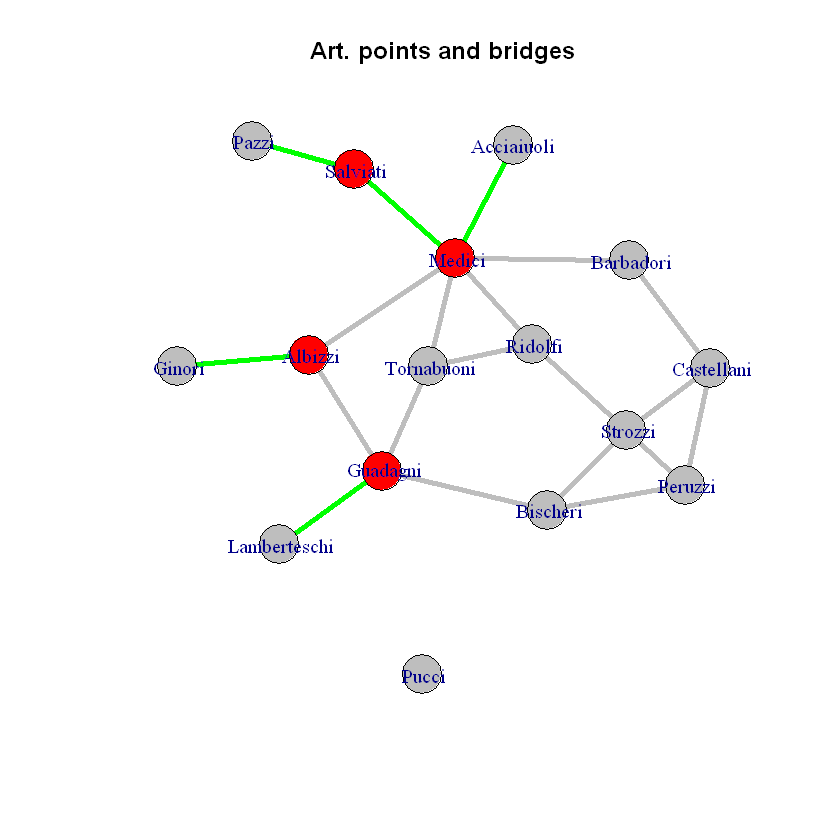

In [13]:
print(articulation.points(network))
print(bridges(network))

vert.colors <- ifelse(V(network) %in% articulation.points(network),'red','gray')
edge.colors <- ifelse(E(network) %in% bridges(network),'green','gray')

plot(network,main="Art. points and bridges",vertex.color=vert.colors,edge.color = edge.colors,edge.width=4)

По графику видно, что если удалить любой из узлов Salviati, Medici, Albizzi, Guadagni, число компонент увеличится.
Также число компонент увеличивается при удалении ребер Pazzi-Salviati, Salviati-Madici, Medici-Acciaiuoli, Ginovi-Albizzi, Lamberteschi-Guadagni.
Функции igraph подтверждают данные предположения.

12. Выполнить пп. 2–8 для направленной сети из файла krackhardt_friendship.csv.

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,0,1,0,0,0,1,0,0,⋯,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,⋯,1,0,0,0,1,1,0,0,0,0
0,1,0,0,0,0,0,0,1,0,⋯,0,0,1,0,0,1,0,1,0,1
0,1,0,0,0,0,1,0,1,0,⋯,1,0,0,0,0,1,0,0,0,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,1,0,1,0,0,1,1,0,⋯,1,0,0,0,1,0,0,0,1,0


     [,1] [,2] 
[1,] "V1" "V2" 
[2,] "V1" "V4" 
[3,] "V1" "V8" 
[4,] "V1" "V12"
[5,] "V1" "V16"


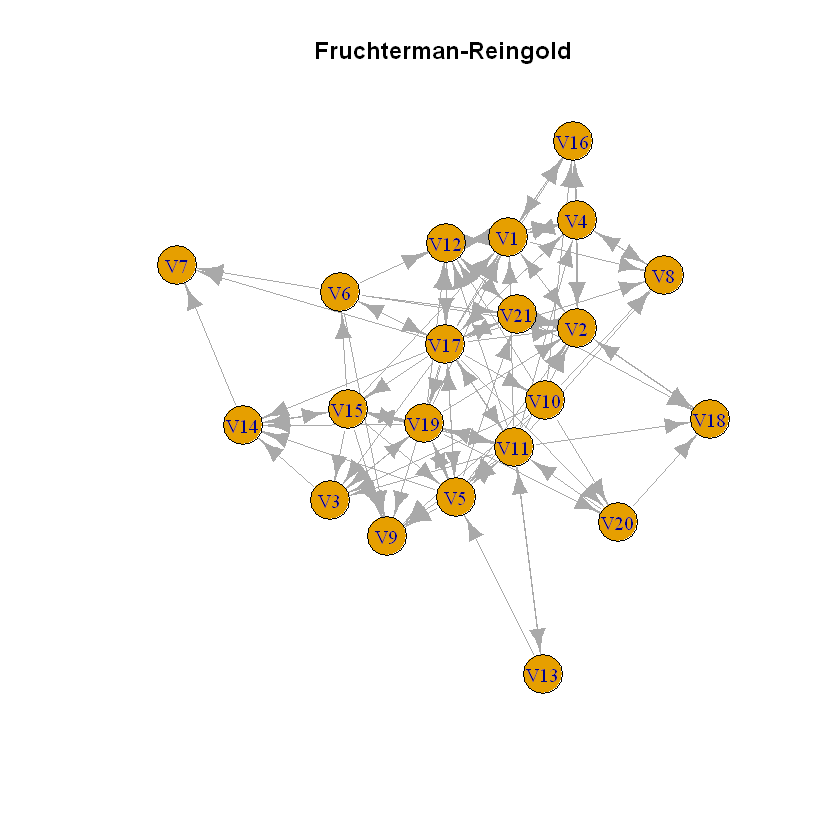

dir.net summary:
IGRAPH 3337e45 DN-- 21 102 -- 
+ attr: name (v/c)
dir.net size:  21 
dir.net density:  0.2428571 
dir.net density 2:  0.2428571 
Components:  1 
Diameter:  5 
Transitivity:  0.4714946 
Mean degree:  9.714286 
Mean in-degree :  4.857143 
Mean out-degree :  4.857143 
Degree variance:  27.51429 
in-degree variance:  4.928571 
out-degree variance:  20.02857 


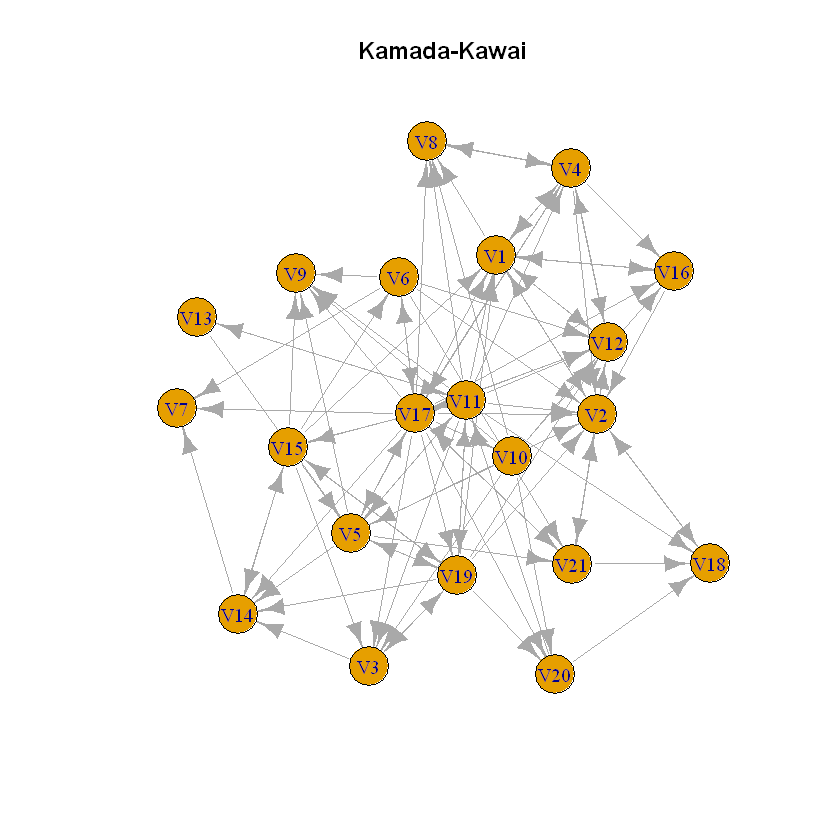

In [21]:
file <- read.table('./even/krackhardt_friendship.csv', sep=",")
data <- data.matrix(file)
data

graph <- graph.adjacency(data,mode="directed")
edges <- get.edgelist(graph)
print(head(edges,5))

dir.net<- graph_from_adjacency_matrix(data,mode="directed")


plot(dir.net,layout = layout.fruchterman.reingold,main="Fruchterman-Reingold")
plot(dir.net,layout = layout.kamada.kawai,main="Kamada-Kawai")

cat("dir.net summary:\n")
summary(dir.net)

cat("dir.net size: ",gorder(dir.net),"\n")

cat("dir.net density: ",edge_density(dir.net),"\n")

den <- gsize(dir.net)/ (factorial(gorder(dir.net)) / factorial(gorder(dir.net)-2))
cat("dir.net density 2: ",den,"\n")

cat("Components: ",components(dir.net)$no,"\n")

cat("Diameter: ",diameter(dir.net),"\n")

cat("Transitivity: ",transitivity(dir.net),"\n" )

cat("Mean degree: ",mean(degree(dir.net)),"\n")
cat("Mean in-degree : ",mean(degree(dir.net,mode = "in")),"\n")
cat("Mean out-degree : ",mean(degree(dir.net,mode = "out")),"\n")

cat("Degree variance: ",var(degree(dir.net)),"\n")
cat("in-degree variance: ",var(degree(dir.net,mode = "in")),"\n")
cat("out-degree variance: ",var(degree(dir.net,mode = "out")),"\n")


13. Заполнить таблицу для различных мер престижа.

In [23]:
Pp<- NULL
g<-gorder(dir.net)
for (v in V(dir.net)){
  Ii<-(length(subcomponent(dir.net,v)) - 1)
  dij <- distances(dir.net,v=v)
  dij[dij==Inf]<-0
  Pp<-append(Pp,Ii*Ii/sum(dij)/(g-1))
}


prestige <- data.frame(n=1:g,
                       deg = degree(dir.net,mode="in",normalized=TRUE),
                        prox = Pp)
prestige

,n,deg,prox
,<int>,<dbl>,<dbl>
V1,1,0.40,0.6451613
V2,2,0.50,0.6666667
V3,3,0.25,0.5882353
V4,4,0.25,0.6060606
V5,5,0.30,0.6666667
V6,6,0.10,0.5882353
V7,7,0.15,0.5128205
V8,8,0.25,0.5714286
V9,9,0.30,0.5882353


| $n_i$ |$P_D^{\prime}(n_i)$|$P_P^{\prime}(n_i)$|
|-------|------|-----------|
|  V1 | 0.40000 | 0.6451613 |
|  V2 | 0.50000 | 0.6666667 |
|  V3 | 0.25000 | 0.5882353 |
|  V4 | 0.25000 | 0.6060606 |
|  V5 | 0.30000 | 0.6666667 |
|  V6 | 0.10000 | 0.5882353 |
|  V7 | 0.15000 | 0.5128205 |
|  V8 | 0.25000 | 0.5714286 |
|  V9 | 0.30000 | 0.5882353 |
| V10 | 0.05000 | 0.6250000 |
| V11 | 0.30000 | 0.7692308 |
| V12 | 0.40000 | 0.6250000 |
| V13 | 0.05000 | 0.4878049 |
| V14 | 0.25000 | 0.5714286 |
| V15 | 0.20000 | 0.6451613 |
| V16 | 0.20000 | 0.5555556 |
| V17 | 0.30000 | 0.9090909 |
| V18 | 0.20000 | 0.5263158 |
| V19 | 0.25000 | 0.6666667 |
| V20 | 0.15000 | 0.5714286 |
| V21 | 0.25000 | 0.5882353 |

Наибольший престиж имеет актор V1. Что подтверждается наибольшим количеством связей у этого актора.

## Выводы
В процессе работы были получены навыки работы с математическим пакетом igraph для моделирования, визуализации и анализа сетей.<br> При выполнении работы возникли трудности, связанные с отсутствием в библиотеке функций для вычисления центральности по информации и престижа по близости, эти функции пришлось написать самостоятельно.
